# Factors that impact the loan approval for an applicant

## Investigation Overview

In this investigation, I wanted to look at the factors that could help the loan applicant to get the approval status. The main focus of this analysis was on some of the variables like 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperScore', 'EmploymentStatus','Occupation','BorrowerHomeOwner','StatedMonthlyIncome', 'Recommendations', LoanOrginalAmount', 'IncomeRange'.

## Dataset OverView

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income and many others.

For simplicity of the visualization I have looked at only few variables as the project objective itself says to focus on only few variables.

## Summary and Insights

* LoanStatus of all Borrowers are with current and completed state
* EmploymentStatus of all Borrowers are with Employed State
* Majority of the loan applicants are from 50K to 75K range with emloyeed status
* The distribution of monthly income of applicants is a right skewed because there will be few applicants with high salary.
* Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C
* LoanStatus with current and completed have own homes when they applied for loans
* The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B
* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates

In [2]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks
from pandas.api.types import CategoricalDtype

%matplotlib inline

#### Reading the Data

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [4]:
# Many variables are in this dataset, I am using only few variables for analysis. Those are:
cols = ['Term',
        'LoanStatus',
        'EstimatedEffectiveYield',
        'BorrowerAPR',
        'BorrowerRate',
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',
        'ListingCategory (numeric)',
        'EmploymentStatus',
        'Occupation',
        'EmploymentStatusDuration',
        'IsBorrowerHomeowner',
        'IncomeVerifiable',
        'StatedMonthlyIncome',
        'MonthlyLoanPayment',
        'Recommendations',
        'DebtToIncomeRatio',
        'LoanOriginalAmount',
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [5]:
loan_df = df[cols]

In [7]:
loan_df = loan_df.dropna()

In [8]:
#Converting term into category
loan_df['Term'] = loan_df['Term'].astype('category')

In [9]:
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha',
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)': 'ListingCategory_Numeric'
                       }, inplace = True)

* The data obtained above is the final dataset, with no Null values and this is my final working dataset(Tidy dataset).

#### Indentifying the type of variables

In [10]:
#Numeric attributes
num_loan_df = loan_df.loc[:, (loan_df.dtypes == np.float64) | (loan_df.dtypes == np.int64)]
num_loan_df.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

In [11]:
#Categorical attributes
cat_loan_df = loan_df.loc[:, (loan_df.dtypes == 'object') | (loan_df.dtypes == 'category')]
cat_loan_df.columns

Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

## Univariate Exploration

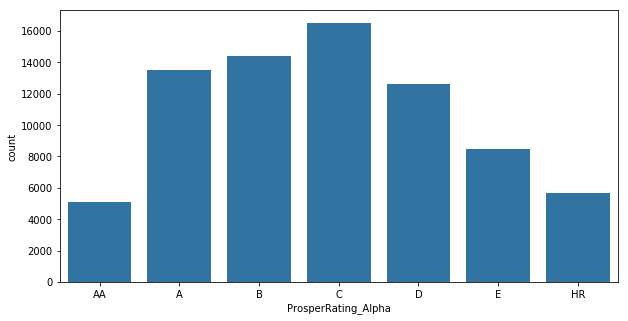

In [12]:
#From the above it seems the order has to be maintained because this is an ordinal variable
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperRating_Alpha', color = base_color);

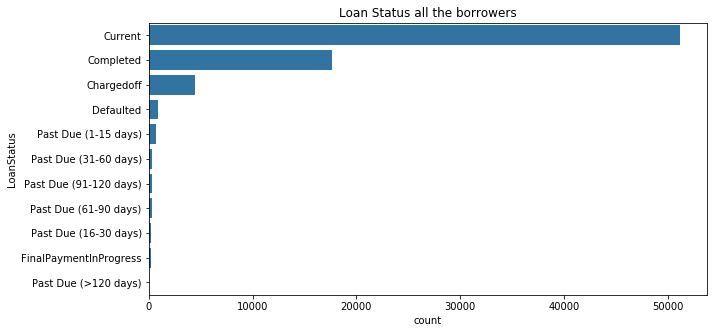

In [13]:
#LoanStatus
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
plt.title("Loan Status all the borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color, 
             order = loan_df['LoanStatus'].value_counts().index);

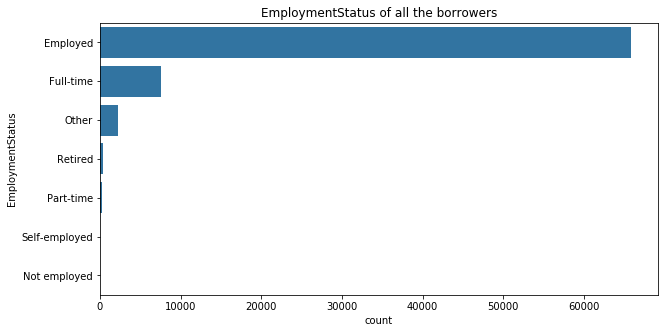

In [14]:
#EmploymentStatus of the borrowers
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all the borrowers")
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color, 
             order = loan_df['EmploymentStatus'].value_counts().index);

In [15]:
loan_df_1 = loan_df[loan_df['IncomeRange'] != 'Not employed']

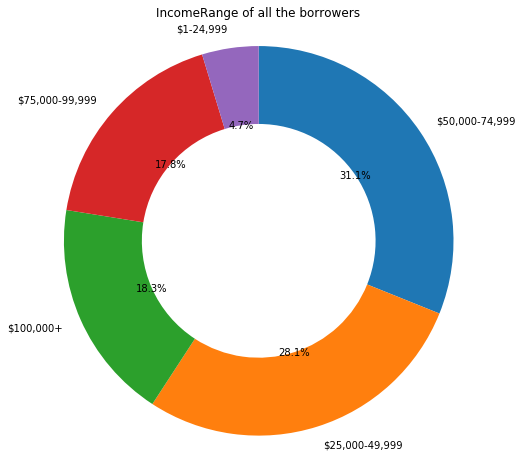

In [16]:
plt.figure(figsize = [15, 8])
sorted_counts = loan_df_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
       counterclock = False, wedgeprops = {'width' : 0.4}, autopct = '%.1f%%');
plt.title("IncomeRange of all the borrowers")
plt.axis('square');

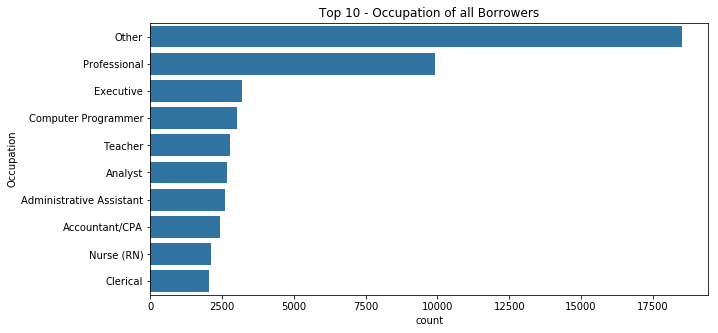

In [17]:
#Occupation of the borrower
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
plt.title("Top 10 - Occupation of all Borrowers");
sb.countplot(data = loan_df, y = 'Occupation', color = base_color, 
             order = loan_df['Occupation'].value_counts().head(10).index);

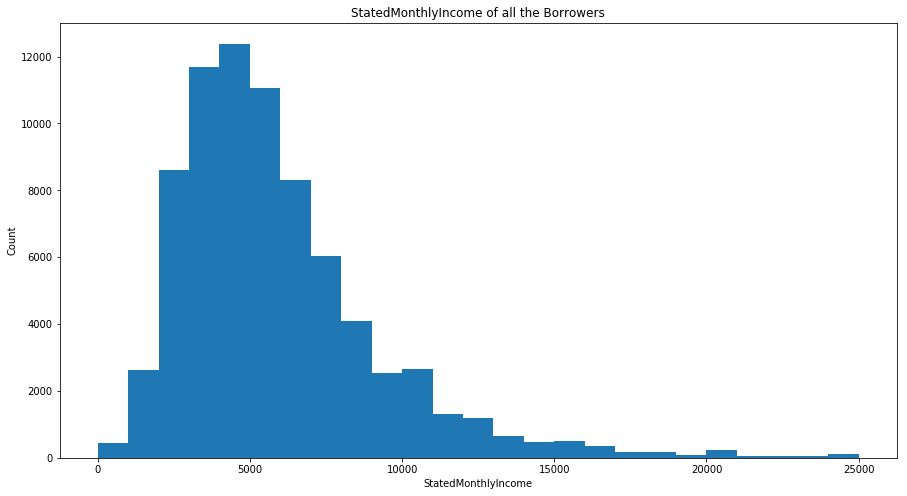

In [18]:
plt.figure(figsize = [15, 8])
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0,loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title('StatedMonthlyIncome of all the Borrowers');

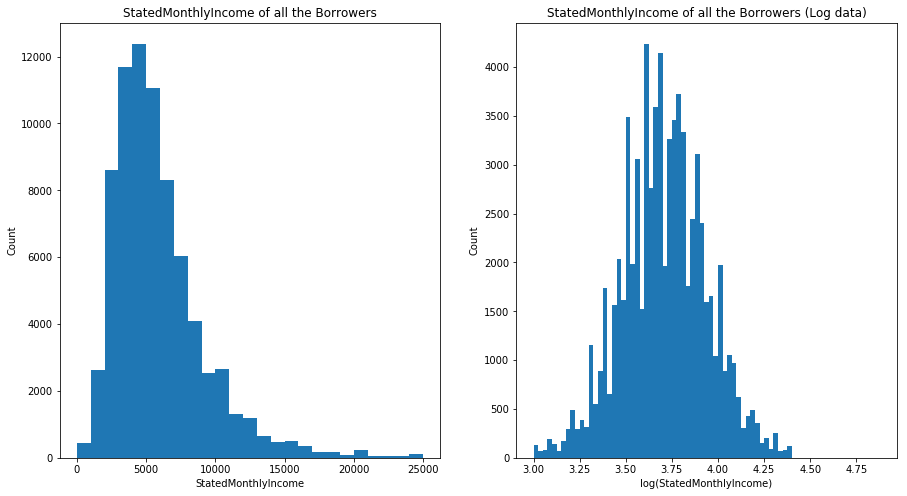

In [19]:
plt.figure(figsize = [15, 8])

#Left histogram: data plottted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0,loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title('StatedMonthlyIncome of all the Borrowers');

#Right historgram: data plotted after log transformation.
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['StatedMonthlyIncome']) # direct data tranformation
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges);
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title('StatedMonthlyIncome of all the Borrowers (Log data)');

# Without Log transformation looks good on StatedMonthlyIncome.

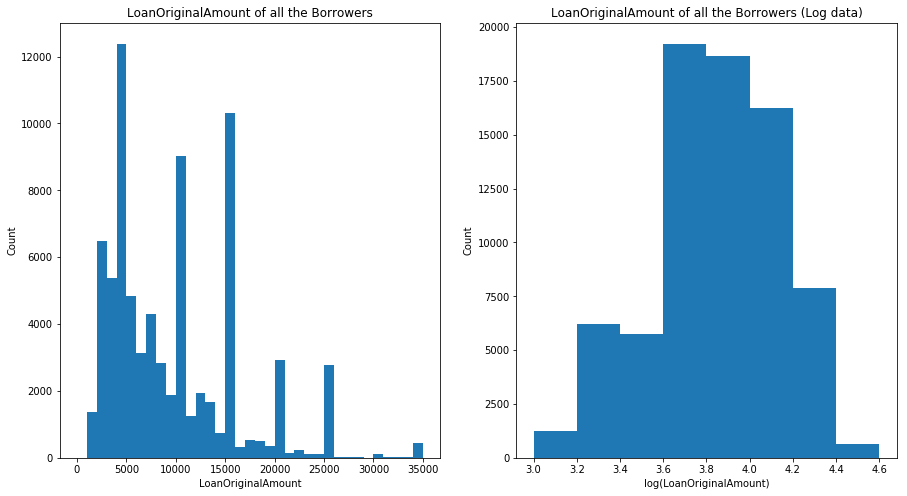

In [20]:
plt.figure(figsize = [15, 8])

#Left histogram: data plottted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0,loan_df_sub['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bin_edges);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count');
plt.title('LoanOriginalAmount of all the Borrowers');

#Right historgram: data plotted after log transformation.
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['LoanOriginalAmount']) # direct data tranformation
log_bin_edges = np.arange(3, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges);
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title('LoanOriginalAmount of all the Borrowers (Log data)');

loan_df['LoanOriginalAmount_log'] = np.log10(loan_df['LoanOriginalAmount'])

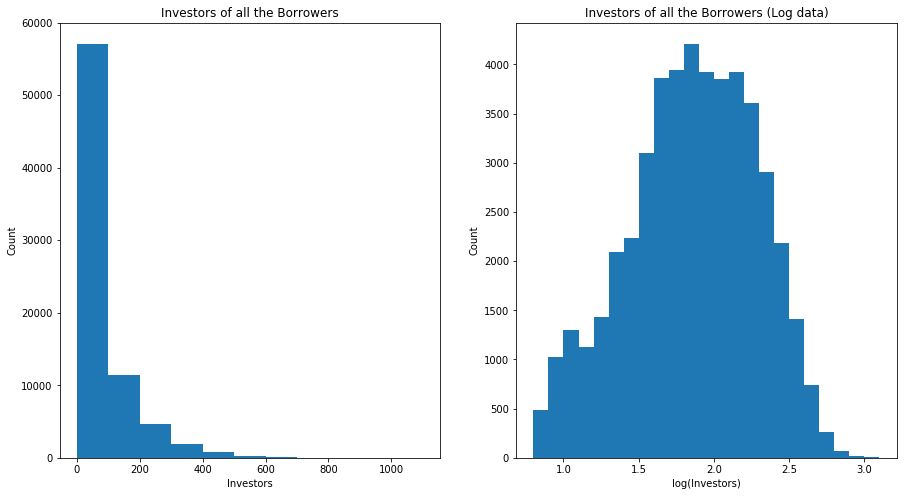

In [21]:
plt.figure(figsize = [15, 8])

#Left histogram: data plottted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0,loan_df_sub['Investors'].max()+10, 100)
plt.hist(data = loan_df, x = 'Investors', bins = bin_edges);
plt.xlabel('Investors');
plt.ylabel('Count');
plt.title('Investors of all the Borrowers');

#Right historgram: data plotted after log transformation.
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['Investors']) # direct data tranformation
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges);
plt.xlabel('log(Investors)');
plt.ylabel('Count');
plt.title('Investors of all the Borrowers (Log data)');

loan_df['Investors_log'] = np.log10(loan_df['Investors'])

### Insights with Numerical variable analysis

* **BorrowerRate:** The Borrower's interest rate for this loan. The Borrowers rate follow an approximately unimodal                 distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.
* **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created. Monthly Income will         definitely be right skewed since very few people will be having a higher salary. So I have cut the outliers and made the       data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is           observed at 5000 USD.
* **LoanOriginalAmount:** The orginal amount of the loan.This part is interesting. Here we see that the distribution is right       skewed with mutliple peaks observed at 4000 USD, 10000 USD and 15000 USD.
* **Investors:**: Majority of the investors are between 0 and 100.

### Bivariate Exploration

##### Relationship between two numeric variables

In [22]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 
                'Recommendations','DebtToIncomeRatio','LoanOriginalAmount', 'PercentFunded', 'Investors',
                'LoanOriginalAmount_log','Investors_log' ]
numeric_vars_1 = ['BorrowerRate','ProsperScore', 'StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount',
               'Investors','LoanOriginalAmount_log','Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha','EmploymentStatus','Occupation', 'IncomeRange',
                 'BorrowerState','Term','IsBorrowerHomeowner']

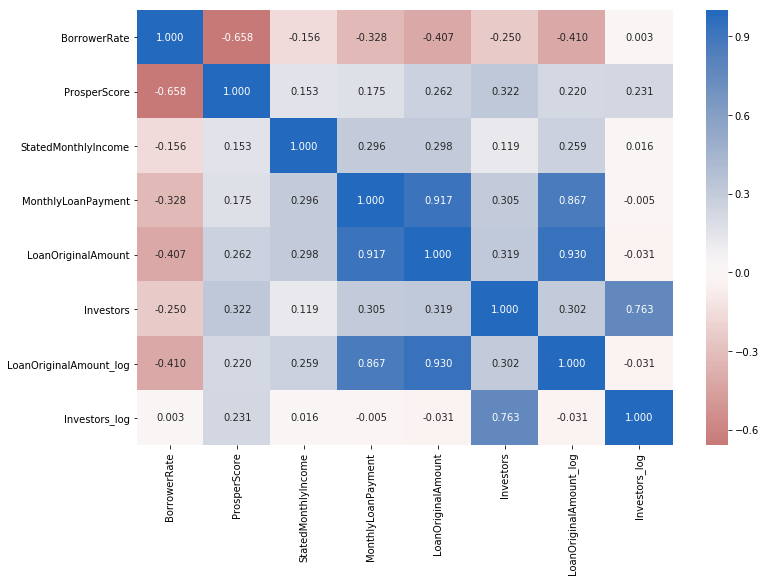

In [23]:
#Correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

##### Relationship between Numeric and Categorical variables

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<function matplotlib.pyplot.show(*args, **kw)>

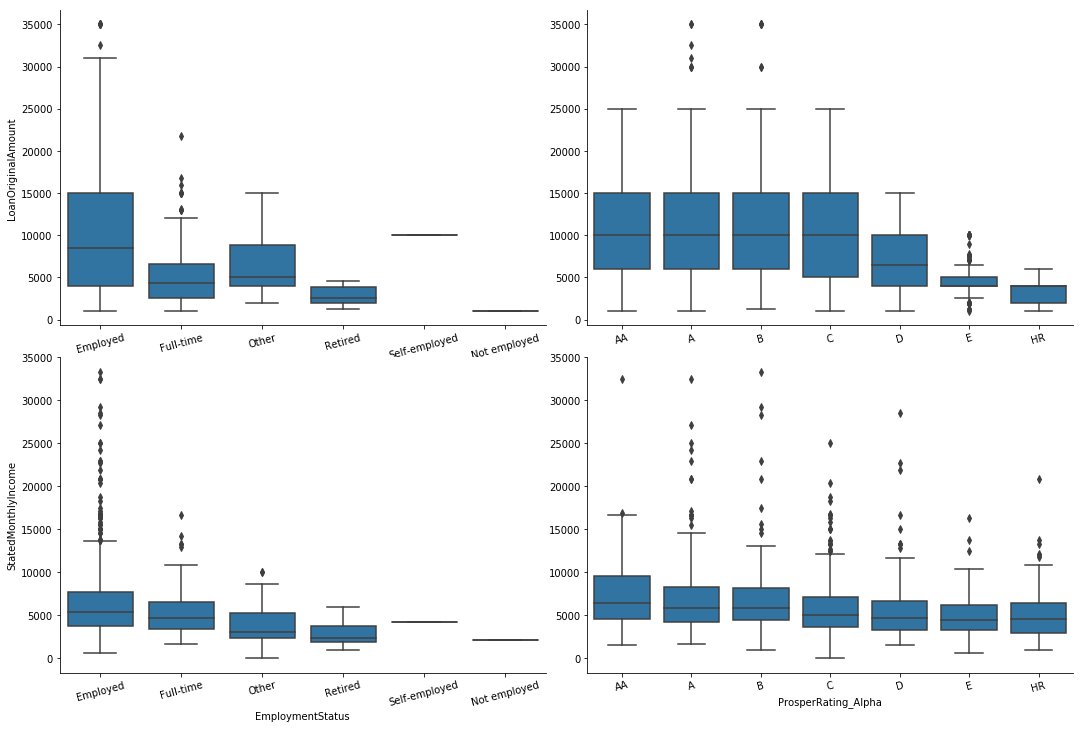

In [24]:
#plot matrix of numeric features against categorical features.
#Using a larger sample since there are fever plots and they are simpler in nature.
categoric_vars_1 = ['EmploymentStatus', 'ProsperRating_Alpha']
samples = np.random.choice(loan_df.shape[0], 2000, replace = False)
loan_df_samp = loan_df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_df_samp, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = categoric_vars_1, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show

Text(0.5,1,'Income Range vs Loan Amoungt')

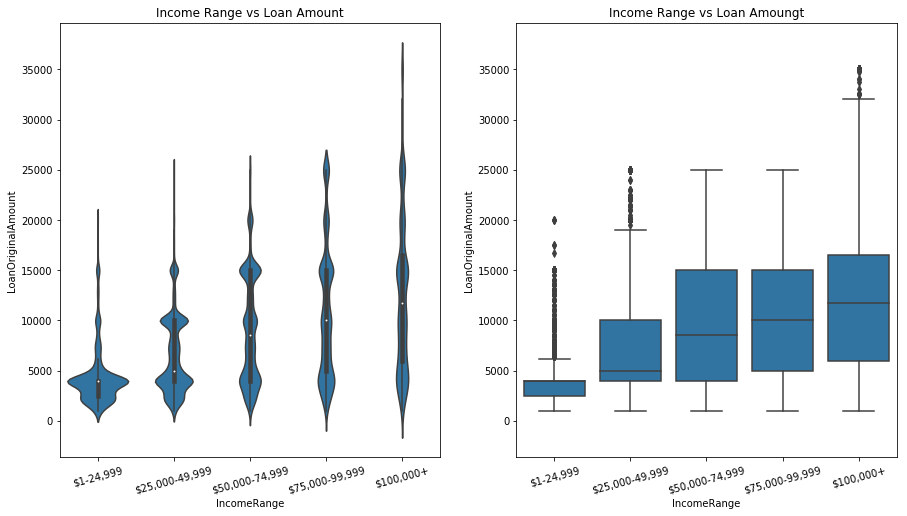

In [25]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000)]
loan_df_sub =loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']

plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

#left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')


#Right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) #set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amoungt')

### Categorical variable analysis

## Homeowner Status vs LoanStatus (Applicants Count)

* From the below analysis we can clearly observe that, the applicants who have their ownhomes have higher count on "Completed"   and "Current" status. This clearly shows that to get the LoanStatus or loan approval, Homeowner status is one of the impotant   factor.

Text(0.5,1,'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

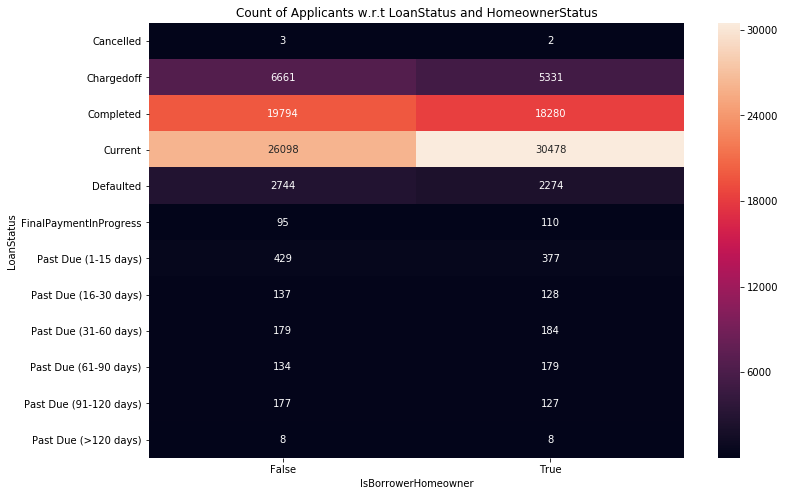

In [26]:
#Count of Applicants w.r.t LoanStatus and HomeownerStatus
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

## Prosper rating dependency on Employment Status and Income Range

* For all the high rating categories like AA, A, B, C, it is quite evident from the graph that the approval of loans are majorly depend on the applicants Income Range and Employment Status.

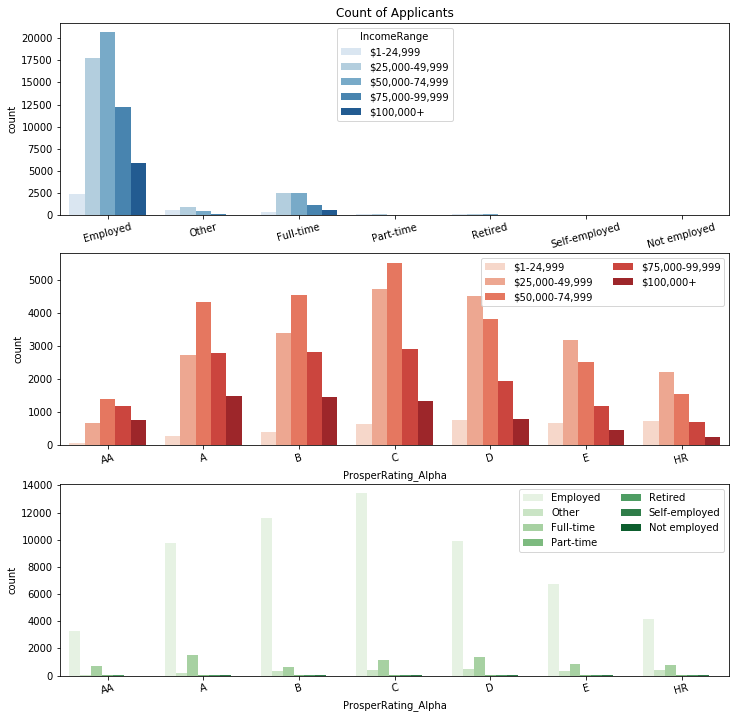

In [27]:
#Since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus','ProsperRating_Alpha','IncomeRange']

plt.figure(figsize = [12, 12])

#subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

#subplot 2: clarity vs cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)

#subplot 3: clarity vs color
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)

plt.show()

### Insights about the Bivariate analysis

* Loan original amount and monthly loan payment is highly correlated and it is expected and the borrowers interest rate and       prosper score are highly correlated(-vely), Borrower interest rate and loanamount are -vely correlated.
* Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees.
* The range of the salaries stated is higher for employed borrowers.
* LoanOriginalAmount is higher for A and B Prosper ratings, when compared with income range, it is following a normal or         expected trend that more salary borrowers are having higher loanoriginalamount.
* LoanStatus with current and completed have own homes when they applied for loans.
* Majority of the loan applicants are from 50k to 75k range with employed status.
* Applicants with incomerange of 50k to 75k range have their prosper rating falling under AA, A, B and C.

## Mulitivariate Exploration

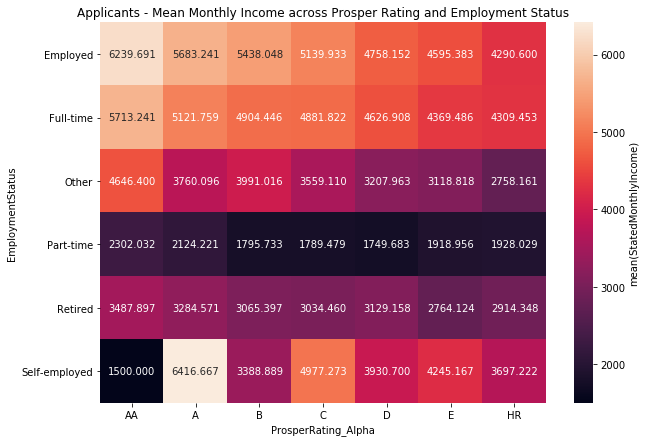

In [28]:
#Indentifying how the applicants mean monthly  income is spread across
plt.figure(figsize = [10,7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha', 
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt ='.3f', cbar_kws = {'label' : 'mean(StatedMonthlyIncome)' });
plt.title('Applicants - Mean Monthly Income across Prosper Rating and Employment Status');

## Applicants rating with Monthly Income and Employment Status

* High rating is given to applicants with employee status having 'employed' and 'full-time' and these applicanys have higher     monthly salary.

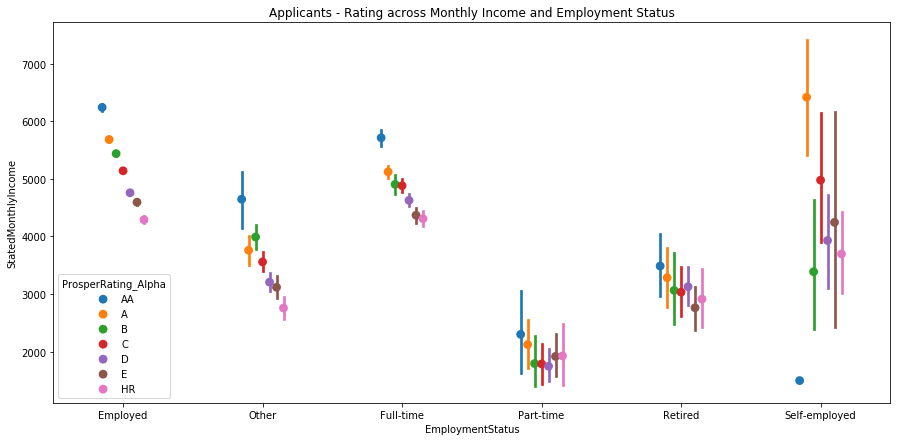

In [29]:
#To identify how the applicants rating is affected by Employment status and Monthly Income
plt.figure(figsize = [15, 7])

ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                 dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and Employment Status');

## Applicants rating with borrowers Interest Rate and Homeowner Status

* We observe that without home, homeowner tend to have a higher interest rate, and thus lower rating. However homeowner tends to have lower interest rate and higher rating. So we can safely conclude that the homeowner is safest bet when giving a loan. We can also observe that the HR prosper rating applicants have higher interest rates.

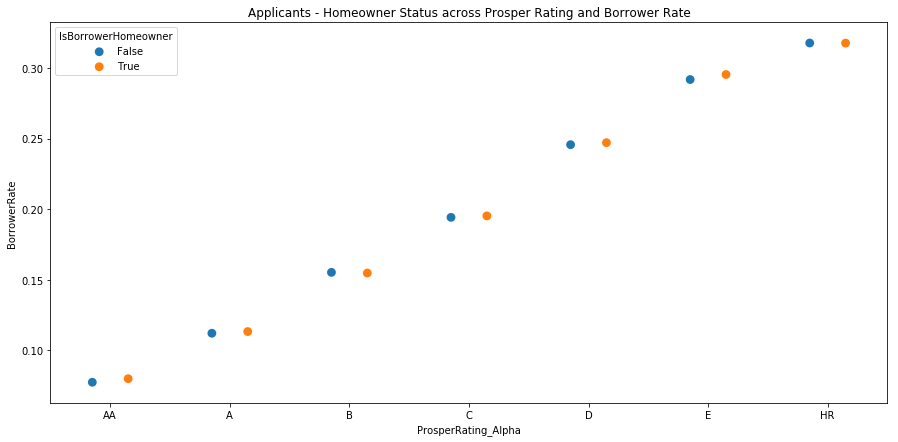

In [30]:
#To observe how the applicants interest rate is affected by ratings.
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                 dodge = 0.3, linestyles = "")
plt.title('Applicants - Homeowner Status across Prosper Rating and Borrower Rate');

* **To conclude the analysis, the loan approval status is mainly dependent on the applicant's IncomeRange, HomeownerStatus and     EmploymentStatus. 

### Insights from the multivariate exploration of data

* For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary.
* Employed and full time employees have their mean salaries in higher range.
* Majority of the borrowers are falling under prosper rating of B, irrespective of the income range.
* The monthly income of borrowers are having higher values for employed, other and fulltime employment status with the prosper   rating of AA, A and B.
* We can also observe from above analysis that without home, homeowner tend to have a higher interest rate, and thus lower       rating. However homeowner tends to have lower interest rate and higher rating. So we can safely conclude that the homeowner     is safest bet when giving a loan. We can also observe that the HR prosper rating applicants have higher interest rates.
* To conclude this analysis, the loan approval status is mainly dependent on the applicants information on IncomeRange,           Homeowner status and employment status. 